In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Rashi\edureka\python\assignment 13\SeaPlaneTravel.csv", parse_dates=['Month'], index_col=['Month'])

In [27]:
df.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [29]:
df['#Passengers'].resample('Y').mean()

Month
2003-12-31    126.666667
2004-12-31    139.666667
2005-12-31           NaN
2006-12-31    170.166667
2007-12-31    197.000000
2008-12-31    225.000000
2009-12-31    238.916667
2010-12-31    284.000000
2011-12-31    328.250000
2012-12-31    368.416667
2013-12-31    381.000000
2014-12-31    428.333333
2015-12-31    476.166667
Freq: A-DEC, Name: #Passengers, dtype: float64

<Axes: xlabel='Month'>

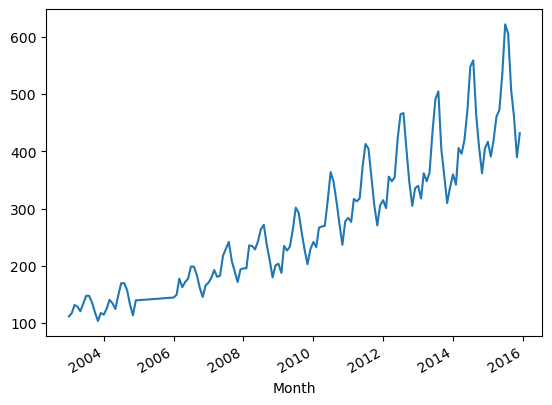

In [7]:
df['#Passengers'].plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['#Passengers'])[1]

0.9918802434376411

In [ ]:
# To apply time series modelling we use arima model 
# ARIMA model - condition: data is stationary (graph - no trends present) OR p < 0.05
# p < 0.5, otherwise data is non-stationary  
# to make p < 0.5, difference is calculated 

# ARIMA = auto regression - integration - moving average
#                p               d               q
#              lag              diff           

In [14]:
# first level and second level differencing 
print('First level diff', adfuller(df['#Passengers'].diff().dropna())[1])
print('Second level diff', adfuller(df['#Passengers'].diff().diff().dropna())[1])

First level diff 0.0542132902838265
Second level diff 2.732891850014085e-29


<Axes: xlabel='Month'>

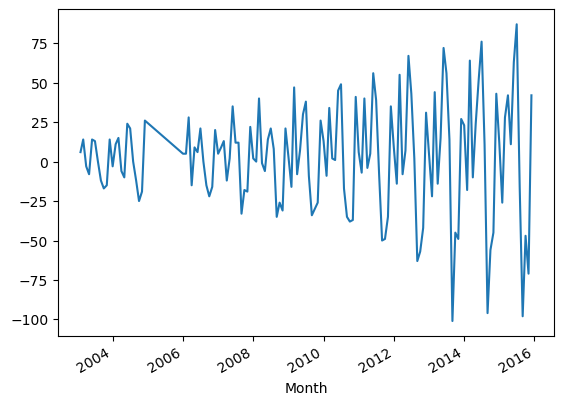

In [18]:
df['#Passengers'].diff().dropna().plot()

<Axes: xlabel='Month'>

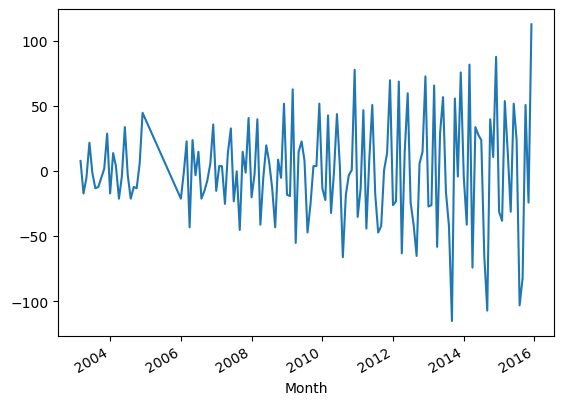

In [19]:
df['#Passengers'].diff().diff().dropna().plot()

In [20]:
import pmdarima as pm
pm.auto_arima(df['#Passengers'])

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [21]:
import statsmodels.api as sm

In [22]:
ts = df['#Passengers']

In [23]:
model = sm.tsa.arima.ARIMA(ts, order = (4,1,3))
result = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [24]:
result.forecast()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


144    467.573802
dtype: float64

In [25]:
result.predict(144, 155)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


144    467.573802
145    490.494557
146    509.136936
147    492.554763
148    495.305967
149    475.947804
150    476.339839
151    475.552139
152    472.353824
153    483.889673
154    475.570194
155    485.921540
Name: predicted_mean, dtype: float64